<h1><center>U of R Baseball Pitching Analysis</center></h1>
<a id='top_page'></a>
***
<table style="width:100%;background-color:lightyellow;border-radius:6px;">
<tr>
<th><a href = "#Alex_Muchnick">Alex Muchnick</a></th>
<th><a href = "#Brendan_Shamieh">Brendan Shamieh</a></th>
<th><a href = "#Dan_Agate">Dan Agate</a></th>
</tr>

<tr>
<td><a href = "#Garrett_Renslow">Garret Renslow</a></td>
<td><a href = "#Hank_Powers">Hank Powers</a></td>
<td><a href = "#Jason_Cobert">Jason Cobert</a></td>
</tr>

<tr>
<td><a href = "#John_Moses">John Moses</a></td>
<td><a href = "#Jon_Turk">Jon Turk</a></td>
<td><a href = "#Luke_Boylan">Luke Boylan</a></td>
</tr>

<tr>
<td><a href = "#Nathan_Slenska">Nathan Slenska</a></td>
<td><a href = "#Spencer_Rojahn">Spencer Rojahn</a></td>
<td><a href = "#Thomas_Karpishin">Thomas Karpishin</a></td>
</tr>

<tr>
<td><a href = "#Trevor_VanAllen">Trevor Van Allen</a></td>
<td></td>
<td></td>
</tr>

</table>

In each section the following stats can be found. Additionally the ranking of these stats for the pitcher is shown
* Pitches per inning - done
* percentage of pitch types
* average strike percentage
* average hit miss percentage - done
* strike percentage by pitch 
* first pitch strike - done
* pitches per batter - done
* strike percentage when changing pitches
***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/feb_15_merged_data_final.csv')
df2 = pd.read_csv('../data/feb_29_merged_data.csv')

In [4]:
final_df = pd.concat([df,df2],sort=False)

In [5]:
df_live = final_df[final_df['live'] == 1]

In [6]:
df_notlive = final_df[final_df['live'] == 0]

In [7]:
pitchers = final_df['pitcher_name'].unique()

In [8]:
def get_pitches_per_inning(temp_df):
    dates = temp_df['date_converted'].unique()
    innings = 0
    for date in dates:
        temp_df2 = temp_df[temp_df['date_converted'] == date]
        innings += temp_df2['inning'].max()
    return round(temp_df.shape[0]/innings,1) 

In [9]:
def get_pitches_per_batter(temp_df):
    batters = sum(temp_df.groupby(['date_converted','inning']).max()['batter_number'])
    return round(temp_df.shape[0]/batters,1)

In [10]:
def get_hit_miss_percentage(temp_df):
    num_hit = temp_df['hit_miss'].value_counts()['Hit']
    return round(num_hit/temp_df.shape[0],1) * 100

In [11]:
def get_first_pitch_strike(live_df):
    first_pitch_strike = 0
    total_batters = 0
    dates = live_df['date_converted'].unique()
    innings = int(live_df['inning'].max())
    batters = int(live_df['batter_number'].max())
    for date in dates:
        temp_df = live_df[live_df['date_converted'] == date]
        for inning in range(1,innings+1):
            temp_df2 = temp_df[temp_df['inning'] == inning]
            for batter in range(1,batters+1):
                temp_df3 = temp_df2[temp_df2['batter_number'] == batter]
                counts = temp_df3['count'].unique()
                total_batters += 1
                if '0b-1s' in counts:
                    first_pitch_strike += 1
                elif len(counts) == 0:
                    first_pitch_strike += 1
    return round(first_pitch_strike/total_batters,2) * 100

In [12]:
def get_results(pitcher):
    temp_live = df_live[df_live['pitcher_name'] == pitcher]
    temp_notlive = df_notlive[df_notlive['pitcher_name'] == pitcher]
    temp_df = final_df[final_df['pitcher_name'] == pitcher]
    print('TOTAL PITCHES:', temp_df.shape[0])
    plt.bar([1,2,3],temp_df['pitch_type'].value_counts(),tick_label=['Fastball','Breaking Ball','Change Up'])
    plt.title("Distribution of Pitches")
    plt.show()
    ### Live Statistics
    print('LIVE STATISTICS')
    pitches_per_inning = get_pitches_per_inning(temp_live)
    print('Average Pitches per Inning ', pitches_per_inning)
    pitches_per_batter = get_pitches_per_batter(temp_live)
    print('Average Pitches per Batter ', pitches_per_batter)
    first_pitch_strike_percentage = get_first_pitch_strike(temp_live)
    print('First Pitch Strike Percentage', first_pitch_strike_percentage)
    ### Not Live Statistics
    print()
    print('NOT LIVE STATISTICS')
    hit_miss_percentage = get_hit_miss_percentage(temp_notlive)
    print('Hit & Miss Percentage ',hit_miss_percentage,'%')


### Alex Muchnick 
<a id='Alex_Muchnick'></a>
<a href="#top_page"> Top of Page </a>

TOTAL PITCHES: 237


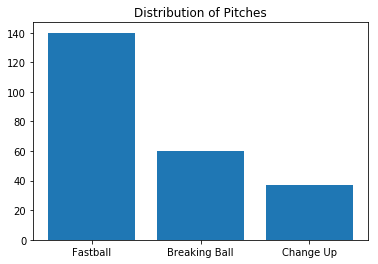

LIVE STATISTICS
Average Pitches per Inning  14.3
Average Pitches per Batter  3.9
First Pitch Strike Percentage 76.0

NOT LIVE STATISTICS
Hit & Miss Percentage  40.0 %


In [13]:
get_results('Alex Muchnick')

### Garrett Renslow
<a id='Garrett_Renslow'></a>
<a href="#top_page"> Top of Page </a>

TOTAL PITCHES: 476


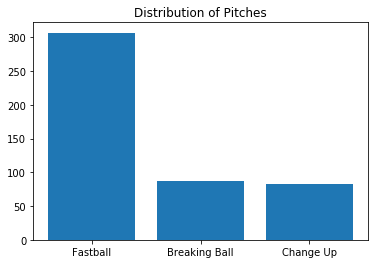

LIVE STATISTICS
Average Pitches per Inning  14.7
Average Pitches per Batter  4.0
First Pitch Strike Percentage 65.0

NOT LIVE STATISTICS
Hit & Miss Percentage  30.0 %


In [14]:
get_results('Garrett Renslow')

### Nathan Slenska
<a id='Nathan_Slenska'></a>
<a href="#top_page"> Top of Page </a>

TOTAL PITCHES: 425


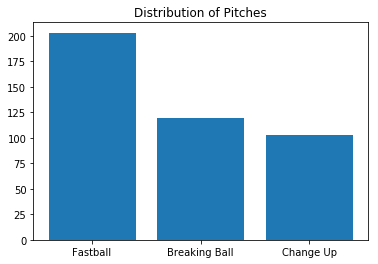

LIVE STATISTICS
Average Pitches per Inning  14.4
Average Pitches per Batter  3.9
First Pitch Strike Percentage 72.0

NOT LIVE STATISTICS
Hit & Miss Percentage  20.0 %


In [16]:
get_results('Nathan Slenska')

### Trevor Van Allen
<a id='Trevor_VanAllen'></a>
<a href="#top_page"> Top of Page </a>

TOTAL PITCHES: 457


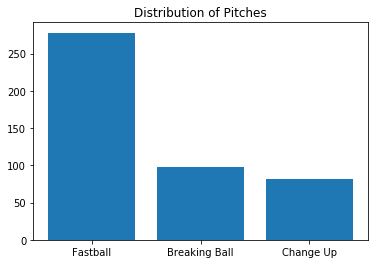

LIVE STATISTICS
Average Pitches per Inning  nan
Average Pitches per Batter  nan
First Pitch Strike Percentage 93.0

NOT LIVE STATISTICS
Hit & Miss Percentage  20.0 %


In [18]:
get_results('Trevor Van Allen')

### Brendan Shamieh
<a id='Brendan_Shamieh'></a>
<a href="#top_page"> Top of Page </a>

TOTAL PITCHES: 325


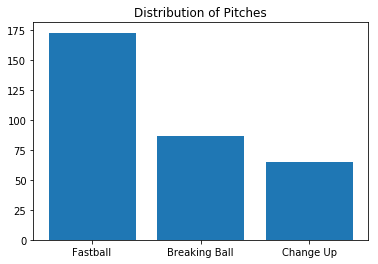

LIVE STATISTICS
Average Pitches per Inning  15.7
Average Pitches per Batter  4.2
First Pitch Strike Percentage 64.0

NOT LIVE STATISTICS
Hit & Miss Percentage  10.0 %


In [19]:
get_results('Brendan Shamieh')

### Hank Powers
<a id='Hank_Powers'></a>
<a href="#top_page"> Top of Page </a>

TOTAL PITCHES: 340


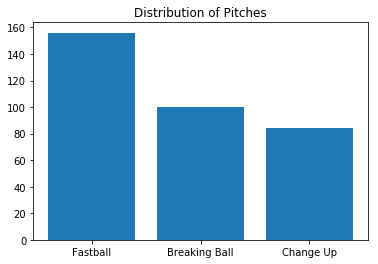

LIVE STATISTICS
Average Pitches per Inning  nan
Average Pitches per Batter  nan
First Pitch Strike Percentage 91.0

NOT LIVE STATISTICS
Hit & Miss Percentage  30.0 %


In [20]:
get_results('Hank Powers')

### Jon Turk
<a id='Jon_Turk'></a>
<a href="#top_page"> Top of Page </a>

In [22]:
# get_results('Jon Turk')

### Spencer Rojahn
<a id='Spencer_Rojahn'></a>
<a href="#top_page"> Top of Page </a>

TOTAL PITCHES: 247


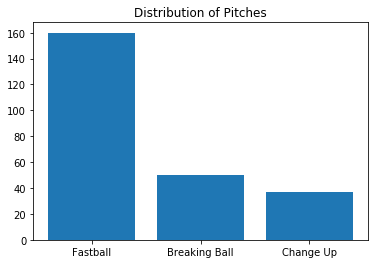

LIVE STATISTICS
Average Pitches per Inning  nan
Average Pitches per Batter  4.9
First Pitch Strike Percentage 91.0

NOT LIVE STATISTICS
Hit & Miss Percentage  20.0 %


In [24]:
get_results('Spencer Rojahn')

### Dan Agate
<a id='Dan_Agate'></a>
<a href="#top_page"> Top of Page </a>

TOTAL PITCHES: 424


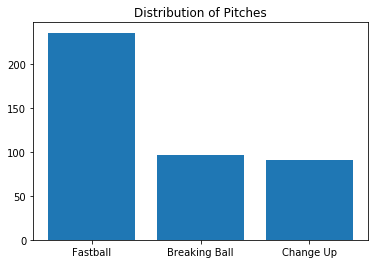

LIVE STATISTICS
Average Pitches per Inning  nan
Average Pitches per Batter  nan
First Pitch Strike Percentage 73.0

NOT LIVE STATISTICS
Hit & Miss Percentage  10.0 %


In [26]:
get_results('Dan Agate')

### Jason Cobert
<a id='Jason_Cobert'></a>
<a href="#top_page"> Top of Page </a>

TOTAL PITCHES: 245


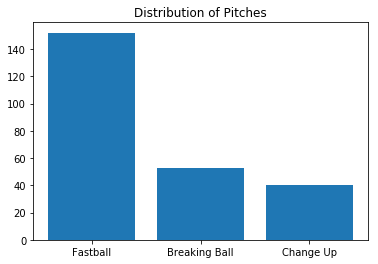

LIVE STATISTICS
Average Pitches per Inning  nan
Average Pitches per Batter  nan
First Pitch Strike Percentage 88.0

NOT LIVE STATISTICS
Hit & Miss Percentage  20.0 %


In [27]:
get_results('Jason Cobert')

### Luke Boylan
<a id='Luke_Boylan'></a>
<a href="#top_page"> Top of Page </a>

TOTAL PITCHES: 279


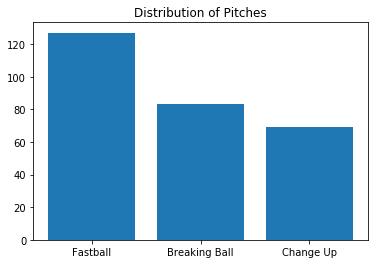

LIVE STATISTICS
Average Pitches per Inning  17.1
Average Pitches per Batter  4.8
First Pitch Strike Percentage 67.0

NOT LIVE STATISTICS
Hit & Miss Percentage  10.0 %


In [28]:
get_results('Luke Boylan')

### Thomas Karpishin
<a id='Thomas_Karpishin'></a>
<a href="#top_page"> Top of Page </a>

TOTAL PITCHES: 221


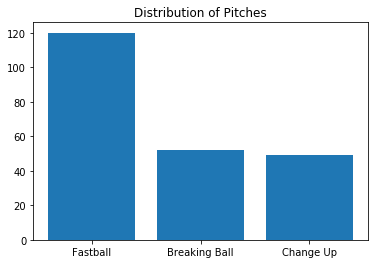

LIVE STATISTICS
Average Pitches per Inning  nan
Average Pitches per Batter  nan
First Pitch Strike Percentage 100.0

NOT LIVE STATISTICS
Hit & Miss Percentage  50.0 %


In [29]:
get_results('Thomas Karpishin')